# Random Sample imputation for Categorical Data

# Import Libraries

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [18]:
df = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [19]:
df.sample(10)

,FireplaceQu,GarageQual,SalePrice
1262,TA,TA,161500
501,NaN,TA,226700
881,TA,TA,187500
1151,Gd,TA,149900
1440,Gd,TA,191000
712,Gd,TA,189000
46,Ex,TA,239686
766,TA,TA,196500
161,Gd,TA,412500
66,Gd,TA,180000


# Check missing (null) value

In [20]:
df.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

# Create X & Y

In [21]:
X = df
y = df['SalePrice']

# Apply Train Test Split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
X_train

,FireplaceQu,GarageQual,SalePrice
455,TA,TA,175500
863,NaN,TA,132500
504,Fa,TA,147000
1413,Gd,TA,257000
1389,Gd,TA,131000
...,...,...,...
466,Po,TA,167000
299,Gd,TA,158500
493,Fa,TA,155000
527,Gd,TA,446261


# New column create in Both Garage & Fire place

In [24]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']
X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [25]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
258,TA,TA,231500,TA,TA
609,NaN,TA,118500,TA,NaN
195,TA,TA,148500,TA,TA
1052,TA,TA,165000,TA,TA
1068,Gd,TA,151400,TA,Gd


# Replace Garage Value and Fireplace Imputed

In [30]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10452\3418880262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10452\3418880262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10452\3418880262.py:3: SettingWithCopyWarning: 
A va

# Review Frequency in Garage Original & Imputed

In [32]:
temp = pd.concat(
[
X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
X_train['GarageQual_imputed'].value_counts() / len(X_train)
],
axis=1)
temp.columns = ['original', 'imputed']
temp

,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.035959
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


# Review Frequency in Fireplace Original & Imputed

In [33]:
temp = pd.concat(
[
X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
X_train['FireplaceQu_imputed'].value_counts() / len(df)
],
axis=1)
temp.columns = ['original', 'imputed']
temp

,original,imputed
Gd,0.494272,0.394521
TA,0.412439,0.330822
Fa,0.040917,0.032192
Po,0.027823,0.022603
Ex,0.024550,0.019863


# Compare category Fireplace before Imputation

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10452\4070077928.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  for category in X_train['FireplaceQu'].dropna().unique(): sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10452\4070077928.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, plea

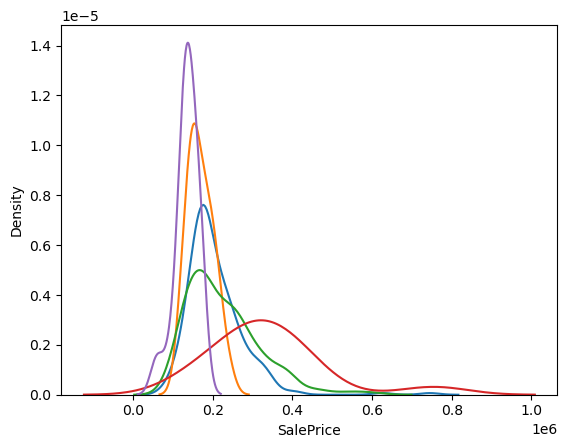

In [35]:
for category in X_train['FireplaceQu'].dropna().unique(): sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

# Compare category fireplace after Imputation

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10452\1231138130.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  for category in X_train['FireplaceQu_imputed'].dropna().unique(): sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10452\1231138130.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new

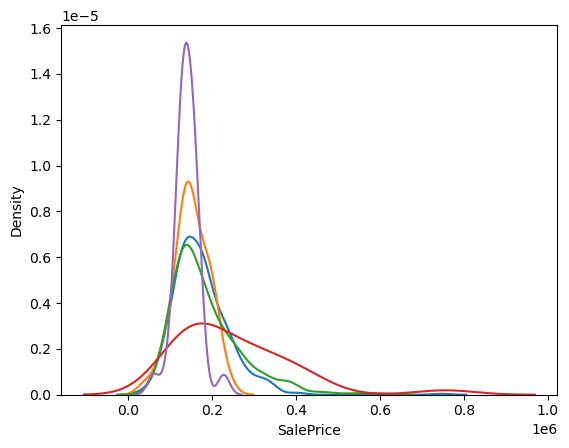

In [37]:
for category in X_train['FireplaceQu_imputed'].dropna().unique(): sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()